In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import os
from utils import *

In [2]:
path = 'Data/N11_ThetaPola_DATA/'
files = [f for f in os.listdir(path) if f.endswith('mat')]
files.sort() # sort files so the polarization and theta are right next to each other in the list 

for element1, element2 in zip(files[::2], files[1::2]):
    print(f"{element1:} {element2:}")

theta_trajs = [] 
pol_trajs = []

for f in files: 
    if f.endswith('POLARIZATION.mat'):
        pol_trajs.append(loadmat(path+f)['POLA'])
    else: 
        theta_trajs.append(loadmat(path+f)['THETAd'])

N11_1_R200_B30_04_05_POLARIZATION.mat N11_1_R200_B30_04_05_ThetaTime.mat
N11_1_R200_B50_04_05_POLARIZATION.mat N11_1_R200_B50_04_05_ThetaTime.mat
N11_1_R200_B50_25_04_POLARIZATION.mat N11_1_R200_B50_25_04_ThetaTime.mat
N11_1_R200_B50_26_04_POLARIZATION.mat N11_1_R200_B50_26_04_ThetaTime.mat
N11_2_R200_B50_26_04_POLARIZATION.mat N11_2_R200_B50_26_04_ThetaTime.mat
N11_3_R200_B50_25_04_POLARIZATION.mat N11_3_R200_B50_25_04_ThetaTime.mat
N11_4_R200_B100_25_04_POLARIZATION.mat N11_4_R200_B100_25_04_ThetaTime.mat
N11_4_R200_B30_25_04_POLARIZATION.mat N11_4_R200_B30_25_04_ThetaTime.mat
N11_4_R200_B50_25_04_POLARIZATION.mat N11_4_R200_B50_25_04_ThetaTime.mat
N11_5_R200_B30_25_04_POLARIZATION.mat N11_5_R200_B30_25_04_ThetaTime.mat
N11_5_R200_B50_25_04_POLARIZATION.mat N11_5_R200_B50_25_04_ThetaTime.mat


In [3]:
print(list(map(len, theta_trajs)))
print(list(map(len, pol_trajs)))

[print(theta[-1, 0], p[-1, 0]) for (theta, p) in zip(theta_trajs, pol_trajs) ]

theta_trajs.pop(-2)
pol_trajs.pop(-2)

theta_trajs.pop(2)
pol_trajs.pop(2)

theta_trajs.pop(4)
pol_trajs.pop(4)

print(list(map(len, theta_trajs)))
print(list(map(len, pol_trajs)))

[5000, 5000, 2450, 5000, 5000, 3000, 5000, 5000, 5000, 1300, 5000]
[5000, 5000, 2400, 5000, 5000, 3000, 5000, 5000, 5000, 1300, 5000]
166.66666666666666 166.66666666666666
166.66666666666666 166.66666666666666
81.66666666666667 80.0
166.66666666666666 166.66666666666666
166.66666666666666 166.66666666666666
100.0 100.0
166.66666666666666 166.66666666666666
166.66666666666666 166.66666666666666
166.66666666666666 166.66666666666666
43.333333333333336 43.333333333333336
166.66666666666666 166.66666666666666
[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


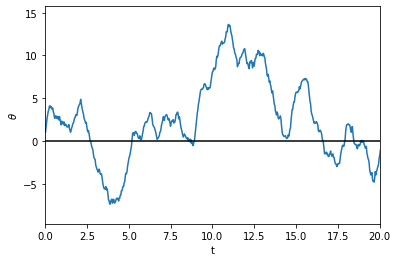

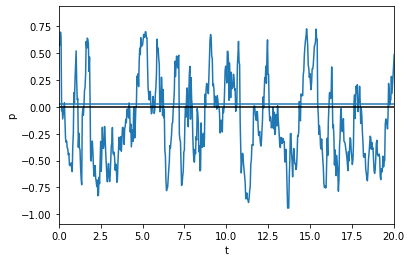

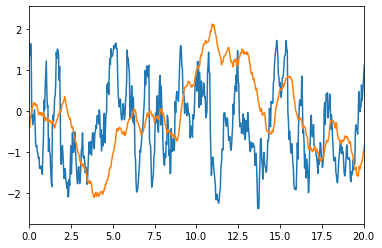

In [5]:
T = theta_trajs[0][:, 0]

plt.plot(T, theta_trajs[2][:, 1])
plt.axhline(y=0, color='k')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.xlim([0, 20])
plt.show()


# plt.plot(pol_trajs[2][:, 0], pol_trajs[2][:, 1])
# plt.axhline(y=np.mean(pol_trajs[2][:, 1]))
plt.plot(T, pol_trajs[2][:, 2])
plt.axhline(y=np.mean(pol_trajs[2][:, 2]))
# plt.plot(pol_trajs[2][:, 0], pol_trajs[2][:, 3])
# plt.axhline(y=np.mean(pol_trajs[2][:, 3]))
plt.axhline(y=0, color='k')
plt.xlabel('t')
plt.ylabel(r'p')
plt.xlim([0, 20])
plt.show()


plt.plot(T, rescale(pol_trajs[2][:, 2]))
plt.plot(T, rescale(theta_trajs[2][:, 1]))
plt.xlim([0, 20])
plt.show() 

[39.25265025225508, 38.64678512653061, 43.23235894169989, 41.8241486632984, 42.320167593272615, 43.01289442213754, 42.55973758986425, 39.77324160368818]
[20.824616672756864, 20.826211110644643, 20.823991261757282, 20.8722318876495, 20.818765812921193, 20.79889788135717, 20.83223913929835, 20.871764344191835]
(8, 5000) (8, 5000)


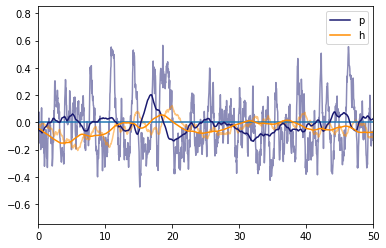

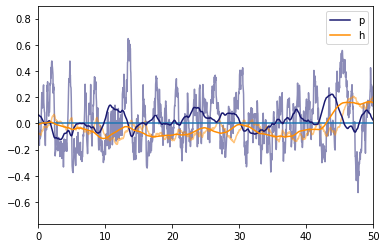

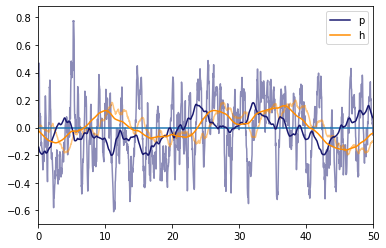

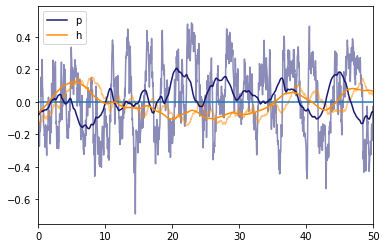

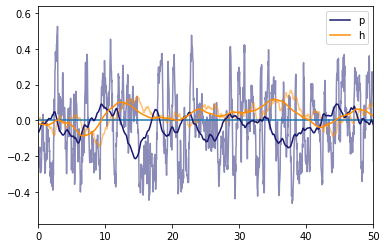

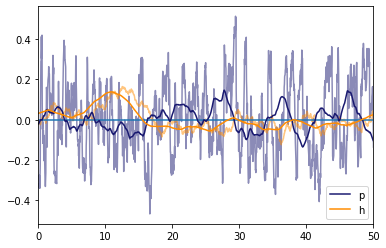

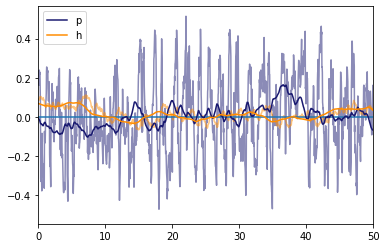

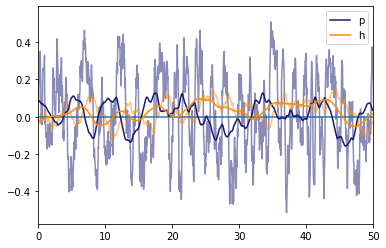

In [10]:
thetas = chop(theta_trajs)
ps = chop(pol_trajs)

L = len(thetas[0])

print(list(map(np.mean, thetas)))
print(list(map(np.mean, ps)))



# trim the trajs to the same lengths 
f1 = lambda x: np.mean(x[:, 1:4], axis=1) - np.mean(x[:, 1:4])
f2 = lambda x: (x[:, 1]-np.mean(x[:, 1]))/180*np.pi 
f3 = lambda x: x[:, 2]
thetas = np.array(list(map(f2, thetas)))
ps = np.array(list(map(f1, ps)))

print(thetas.shape, ps.shape)

w = 100
kernel = np.ones(w)/w


for i in range(len(thetas)):
    plt.plot(T, ps[i], alpha=0.5, c='midnightblue')
    plt.plot(T, thetas[i], alpha=0.5, c='darkorange')
    plt.axhline(y=0)
    plt.xlim([0, 50])
#     plt.show() 
    
    plt.plot(T[:-w+1], np.convolve(ps[i], kernel, 'valid'), c='midnightblue', label='p')
    plt.plot(T[:-w+1], np.convolve(thetas[i], kernel, 'valid'), c='darkorange', label='h')
    plt.legend()
    plt.show() 

(-963.6124773931497+572.8428082765554j)


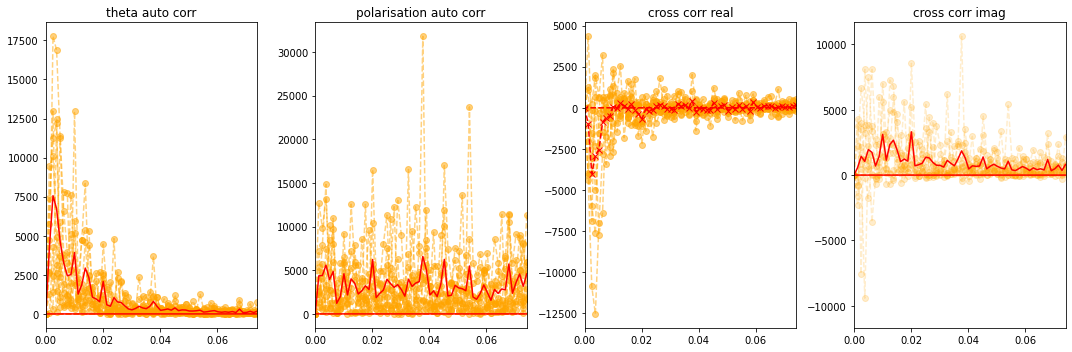

In [12]:
fig, axs = plt.subplots(1, 4, sharex=True, figsize=(15, 5))

omegas = np.fft.fftfreq(L)*2*np.pi

for (theta, p) in zip(thetas, ps):
    theta_omega = np.fft.fft(theta)
    p_omega = np.fft.fft(p)
    theta_corr = np.abs(theta_omega)**2
    p_corr = np.abs(p_omega)**2
    cross_corr = np.conj(theta_omega)*p_omega
    
    
    axs[0].plot(omegas, theta_corr, 'o--', alpha=0.5, color='orange')
    axs[1].plot(omegas, p_corr, 'o--', alpha=0.5, color='orange')
    axs[2].plot(omegas, cross_corr.real, 'o--', alpha=0.5, color='orange')
    axs[3].plot(omegas, cross_corr.imag, 'o--', alpha=0.2, color='orange')


theta_corr = np.mean(np.abs(np.fft.fft(thetas))**2, axis=0)
axs[0].plot(omegas, theta_corr, color='red')
axs[0].set_title('theta auto corr')


p_corr = np.mean(np.abs(np.fft.fft(ps))**2, axis=0)
axs[1].plot(omegas, p_corr, color='red')
axs[1].set_title('polarisation auto corr')

cross_corr = np.mean(np.conjugate(np.fft.fft(thetas))*np.fft.fft(ps), axis=0)
axs[2].plot(omegas, cross_corr.real, 'x--', color='red')

axs[2].set_title('cross corr real')
# axs[2].set_ylim([-80000, 80000])

axs[3].plot(omegas, cross_corr.imag, color='red')
axs[3].set_title('cross corr imag')

print(cross_corr[1])


axs[0].set_xlim([0, max(omegas[:60])])
plt.tight_layout()
plt.show()  

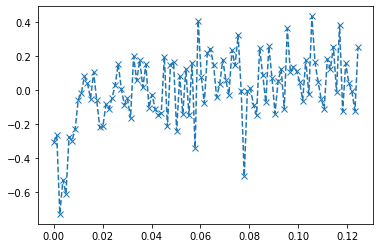

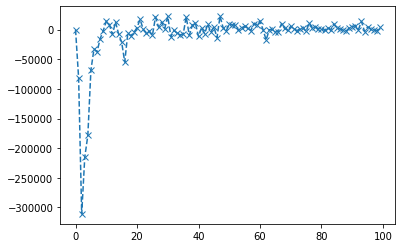

In [13]:
ratio = cross_corr/np.sqrt(theta_corr*p_corr)

plt.plot(omegas[:100], ratio.real[:100], 'x--')
plt.show() 

plt.plot(cross_corr.real[:100], 'x--')
plt.show() 

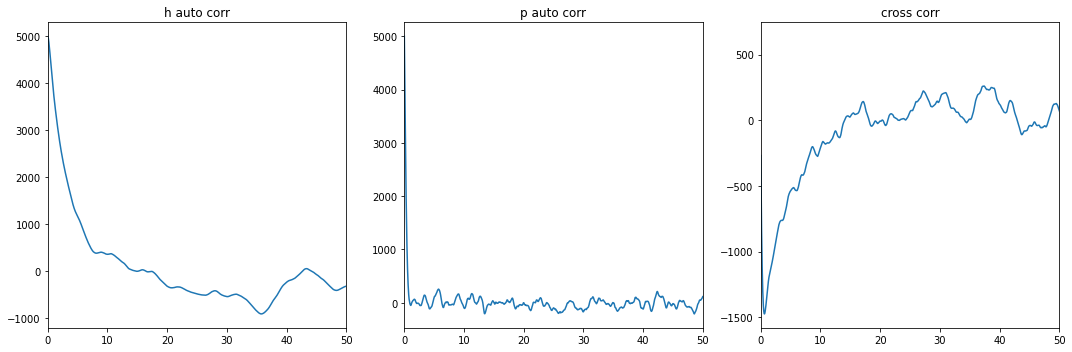

In [21]:
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(15, 5))

axs[0].plot(T, np.fft.ifft(theta_corr).real, label='fft')
axs[0].set_title('h auto corr')
axs[0].set_xlim([0, 50])

axs[1].plot(T, np.fft.ifft(p_corr).real, label='fft')
axs[1].set_title('p auto corr')

cross_corr_pos = np.copy(cross_corr)
cross_corr_pos[cross_corr.real < 0] = - np.conjugate(cross_corr_pos[cross_corr.real < 0])
axs[2].plot(T, np.fft.ifft(cross_corr).real, label='true') 
axs[2].set_title('cross corr')

plt.tight_layout()
plt.show() 

In [1]:
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 2})

for (p, theta) in zip(pol_trajs, theta_trajs):
    L = min(len(theta), len(p))
    
    t = theta[:L, 0]
    
    theta_t = rescale(theta[:L, 1])
    p_t = rescale(np.mean(p[:L, 1:4], axis=1))
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    T = 500
    axs[0].plot(t[:T], p_t[:T], label='p')
    axs[0].plot(t[:T], theta_t[:T], label='theta')
    axs[0].axhline(y=0, color='k')
    axs[0].set_xlabel('t')
    axs[0].legend()
    
    omegas = np.fft.fftfreq(L, d=t[0])[:100]*2*np.pi
    theta_omega = np.fft.fft(theta_t)
    p_omega = np.fft.fft(p_t)
    
    theta_corr = np.abs(theta_omega)**2
    p_corr = np.abs(p_omega)**2
    cross_corr = np.conj(theta_omega)*p_omega
    
    axs[1].plot(omegas, theta_corr[:100], label='theta_corr')
    axs[1].plot(omegas, p_corr[:100], label='p corr')
    axs[1].plot(omegas, cross_corr[:100], label='cross corr')
    axs[1].set_xlabel('omega')
    axs[1].legend() 
    plt.tight_layout()
    plt.show()

NameError: name 'plt' is not defined